**Step 0: Imports and Reading Data**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

This notebook is designed to run on Kaggle. If you are running it locally, please ensure the dataset file is in the same directory and update the pd.read_csv path accordingly.

In [ ]:
df = pd.read_csv('social_media_vs_productivity.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/social-media-vs-productivity/social_media_vs_productivity.csv'

**Step 1.1: Basic Data Exploration**

An initial overview is conducted to understand the structure of the dataset. This dataset, consisting of 30,000 observations and 19 features, includes users' demographic information, digital habits, and subjective/objective productivity scores. The df.info() and df.describe() outputs allow us to analyze the data types of the variables and measures of central tendency (mean, standard deviation, etc.).

In [ ]:
df.shape

(30000, 19)

In [ ]:
df.head()

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060


In [ ]:
df.columns

Index(['age', 'gender', 'job_type', 'daily_social_media_time',
       'social_platform_preference', 'number_of_notifications',
       'work_hours_per_day', 'perceived_productivity_score',
       'actual_productivity_score', 'stress_level', 'sleep_hours',
       'screen_time_before_sleep', 'breaks_during_work', 'uses_focus_apps',
       'has_digital_wellbeing_enabled', 'coffee_consumption_per_day',
       'days_feeling_burnout_per_month', 'weekly_offline_hours',
       'job_satisfaction_score'],
      dtype='object')

In [ ]:
df.dtypes

age                                 int64
gender                             object
job_type                           object
daily_social_media_time           float64
social_platform_preference         object
number_of_notifications             int64
work_hours_per_day                float64
perceived_productivity_score      float64
actual_productivity_score         float64
stress_level                      float64
sleep_hours                       float64
screen_time_before_sleep          float64
breaks_during_work                  int64
uses_focus_apps                      bool
has_digital_wellbeing_enabled        bool
coffee_consumption_per_day          int64
days_feeling_burnout_per_month      int64
weekly_offline_hours              float64
job_satisfaction_score            float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         27235 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    28386 non-null  float64
 8   actual_productivity_score       27635 non-null  float64
 9   stress_level                    28096 non-null  float64
 10  sleep_hours                     27402 non-null  float64
 11  screen_time_before_sleep        27789 non-null  float64
 12  breaks_during_work              

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30000.0,41.486867,13.835221,18.000000,30.000000,41.000000,53.000000,65.000000
daily_social_media_time,27235.0,3.113418,2.074813,0.000000,1.639566,3.025913,4.368917,17.973256
number_of_notifications,30000.0,59.958767,7.723772,30.000000,55.000000,60.000000,65.000000,90.000000
work_hours_per_day,30000.0,6.990792,1.997736,0.000000,5.643771,6.990641,8.354725,12.000000
perceived_productivity_score,28386.0,5.510488,2.023470,2.000252,3.757861,5.525005,7.265776,8.999376
actual_productivity_score,27635.0,4.951805,1.883378,0.296812,3.373284,4.951742,6.526342,9.846258
stress_level,28096.0,5.514059,2.866344,1.000000,3.000000,6.000000,8.000000,10.000000
sleep_hours,27402.0,6.500247,1.464004,3.000000,5.493536,6.498340,7.504143,10.000000
screen_time_before_sleep,27789.0,1.025568,0.653355,0.000000,0.528490,1.006159,1.477221,3.000000
breaks_during_work,30000.0,4.992200,3.173737,0.000000,2.000000,5.000000,8.000000,10.000000


**Step 1.2: Missing Values and Data Types**

Missing data (NaN) in the dataset are identified because they would hinder model training. Analysis revealed missing values in critical columns such as daily_social_media_time, stress_level, and sleep_hours. To avoid distorting the data distribution and manage the risk of outliers distorting the mean, these missing values were filled in with the median values ​​of the relevant columns.

In [ ]:
#   Checking missing values. Finding the number of NAN elements in the dataset
df.isna().sum()

age                                  0
gender                               0
job_type                             0
daily_social_media_time           2765
social_platform_preference           0
number_of_notifications              0
work_hours_per_day                   0
perceived_productivity_score      1614
actual_productivity_score         2365
stress_level                      1904
sleep_hours                       2598
screen_time_before_sleep          2211
breaks_during_work                   0
uses_focus_apps                      0
has_digital_wellbeing_enabled        0
coffee_consumption_per_day           0
days_feeling_burnout_per_month       0
weekly_offline_hours                 0
job_satisfaction_score            2730
dtype: int64

In [ ]:
# Numeric columns with missing values
columns_to_impute = [
    'daily_social_media_time',
    'perceived_productivity_score',
    'actual_productivity_score',
    'stress_level',
    'sleep_hours',
    'screen_time_before_sleep',
    'job_satisfaction_score'
]

# Fill NaN values in each column with the median of that column
for col in columns_to_impute:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

In [ ]:
# Checking if there are any missing values after filling
print("Situation after filling in missing values:")
print(df.isna().sum())

Situation after filling in missing values:
age                               0
gender                            0
job_type                          0
daily_social_media_time           0
social_platform_preference        0
number_of_notifications           0
work_hours_per_day                0
perceived_productivity_score      0
actual_productivity_score         0
stress_level                      0
sleep_hours                       0
screen_time_before_sleep          0
breaks_during_work                0
uses_focus_apps                   0
has_digital_wellbeing_enabled     0
coffee_consumption_per_day        0
days_feeling_burnout_per_month    0
weekly_offline_hours              0
job_satisfaction_score            0
dtype: int64


**Step 1.3: Descriptive Statistics**

Data distributions are visualized using histograms to check for deviations from normal distribution. A correlation matrix was calculated to understand which variables influence the target variable, productivity score. Initial findings indicate a weak but positive correlation between the number of breaks and social media use.

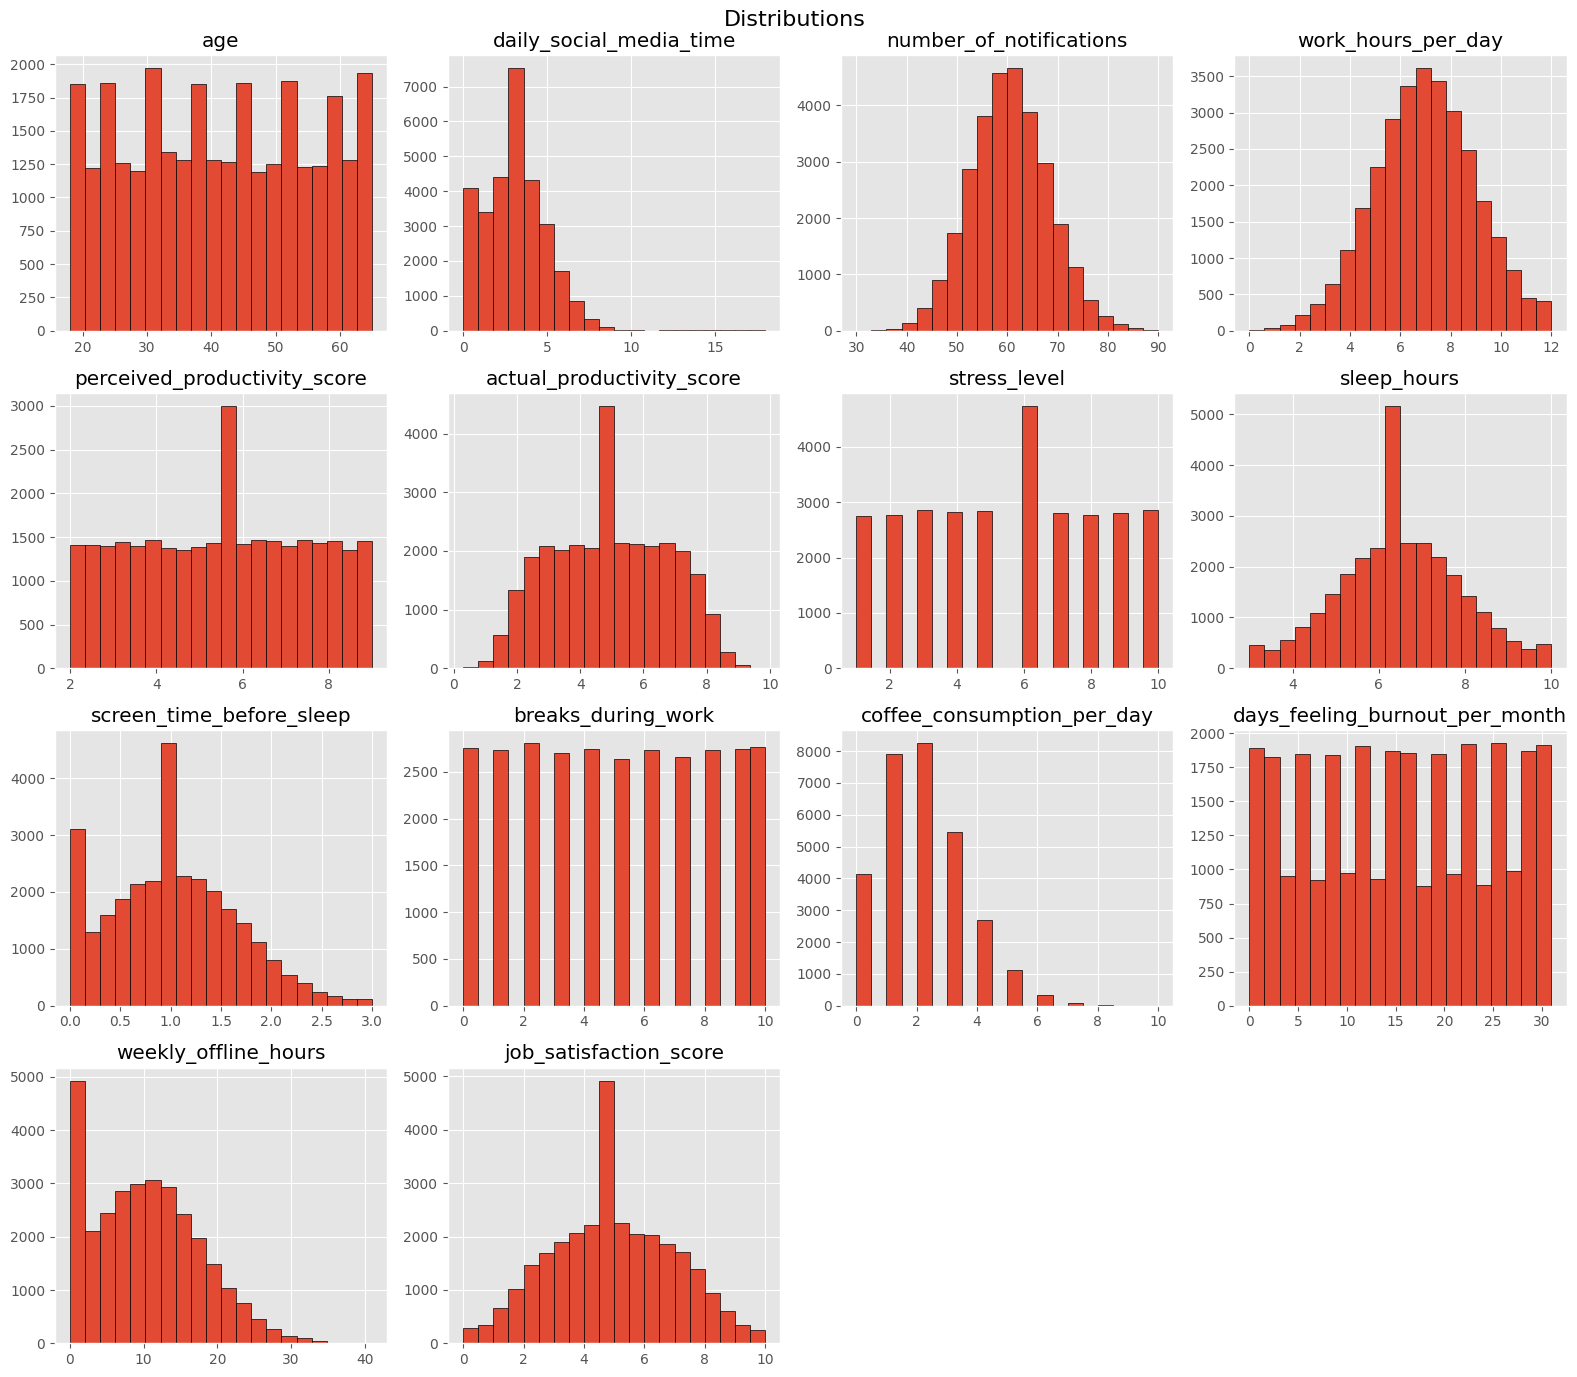

In [ ]:
# Key distributions
df.hist(
    bins=20,
    figsize=(16, 14),
    edgecolor="black"
)

plt.suptitle("Distributions", fontsize=16)
plt.tight_layout()
plt.show()

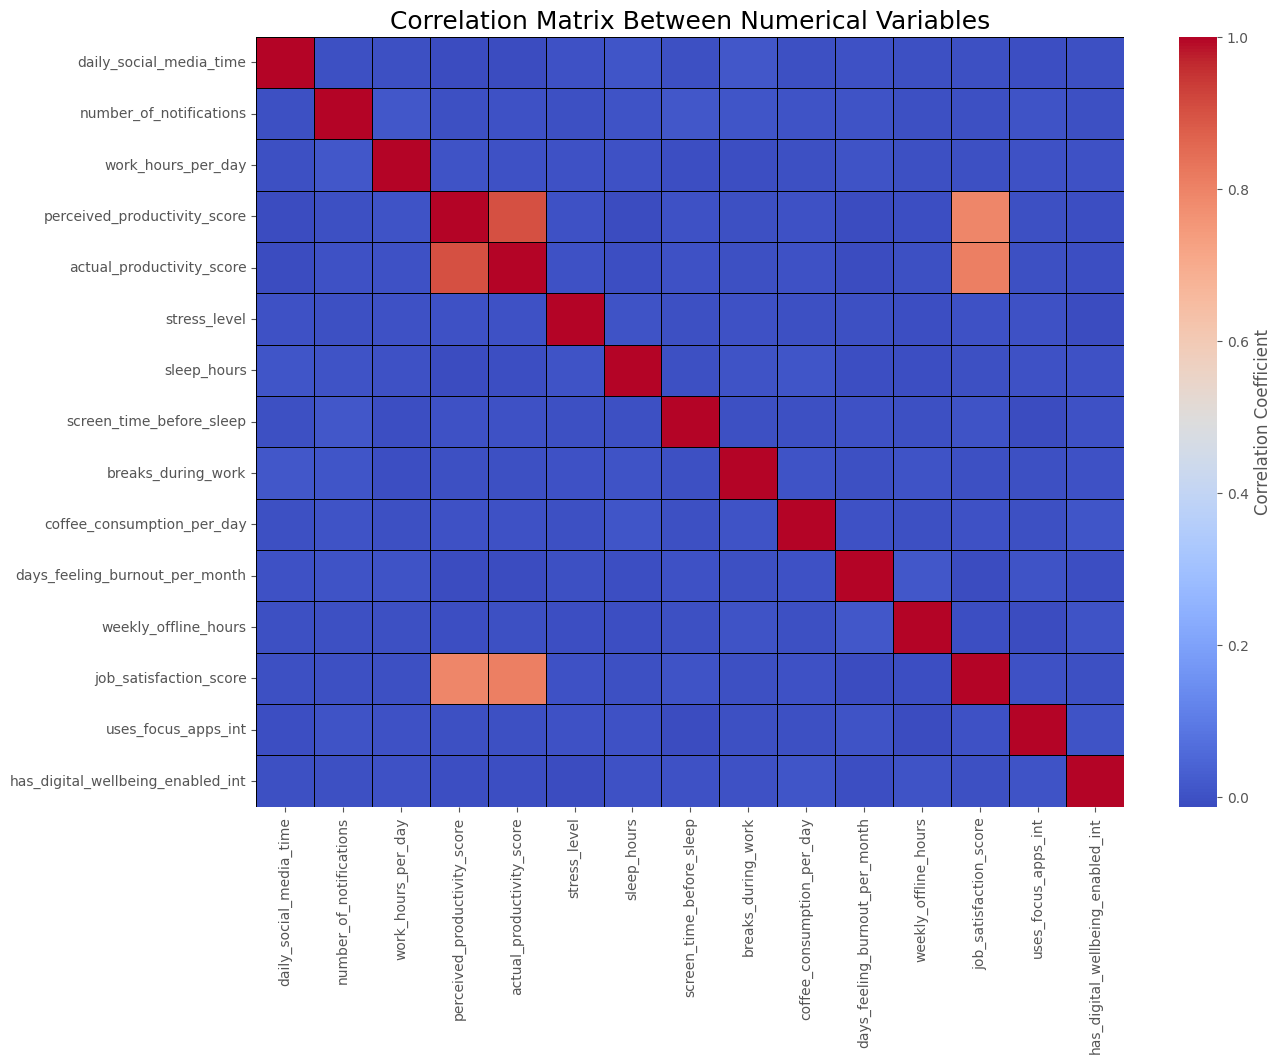

In [ ]:
# What numerical and binary variables most influence the Actual Productivity Score? (Correlation)

# Convert Boolean columns (True/False) to 1/0 before including them in the analysis
df['uses_focus_apps_int'] = df['uses_focus_apps'].astype(int)
df['has_digital_wellbeing_enabled_int'] = df['has_digital_wellbeing_enabled'].astype(int)

# Creating a numeric column list
numerical_cols = [
    'daily_social_media_time', 'number_of_notifications', 'work_hours_per_day', 
    'perceived_productivity_score', 'actual_productivity_score', 'stress_level', 
    'sleep_hours', 'screen_time_before_sleep', 'breaks_during_work', 
    'coffee_consumption_per_day', 'days_feeling_burnout_per_month', 
    'weekly_offline_hours', 'job_satisfaction_score', 
    'uses_focus_apps_int', 'has_digital_wellbeing_enabled_int'
]

# Correlation Matrix Calculation
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix, 
    annot=False, # Notation is kept closed to avoid cluttering the visual.
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=.5, 
    linecolor='black',
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Correlation Matrix Between Numerical Variables', fontsize=18)
plt.show()

In [ ]:
# Show the 5 most important correlations numerically
print("Strongest Correlations with Breaks during Work:")
print(corr_matrix['breaks_during_work'].sort_values(ascending=False).head(5))

Strongest Correlations with Breaks during Work:
breaks_during_work         1.000000
daily_social_media_time    0.014209
number_of_notifications    0.008816
weekly_offline_hours       0.006579
sleep_hours                0.005375
Name: breaks_during_work, dtype: float64


**Step 1.4: Research Queries and Analytical Insights**

At this stage, meaningful insights are derived from the dataset:

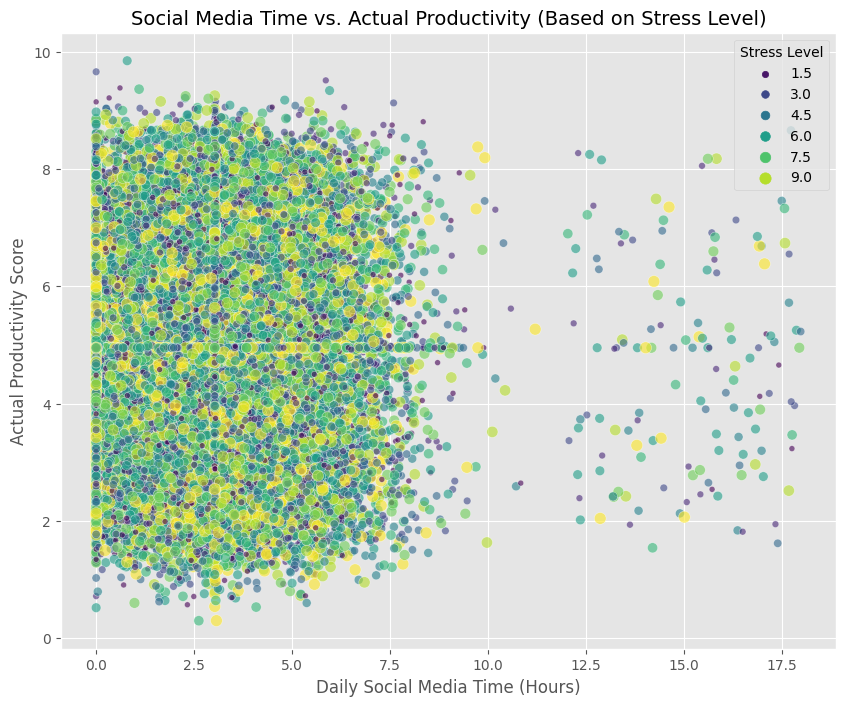

In [ ]:
#1 Does Daily Social Media Time Affect Actual Productivity, and What Role Does Stress Play?

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df,
    x='daily_social_media_time',
    y='actual_productivity_score',
    hue='stress_level', # Show stress level by color
    palette='viridis',
    size='stress_level', # Show stress level by point size
    alpha=0.6
)
plt.title('Social Media Time vs. Actual Productivity (Based on Stress Level)', fontsize=14)
plt.xlabel('Daily Social Media Time (Hours)')
plt.ylabel('Actual Productivity Score')
plt.legend(title='Stress Level', loc='upper right')
plt.show()

In this graph, we see that the social media usage and productivity scores are randomly distributed across the entire area. This suggests that productivity doesn't have a simple linear relationship that can be explained solely by social media time.

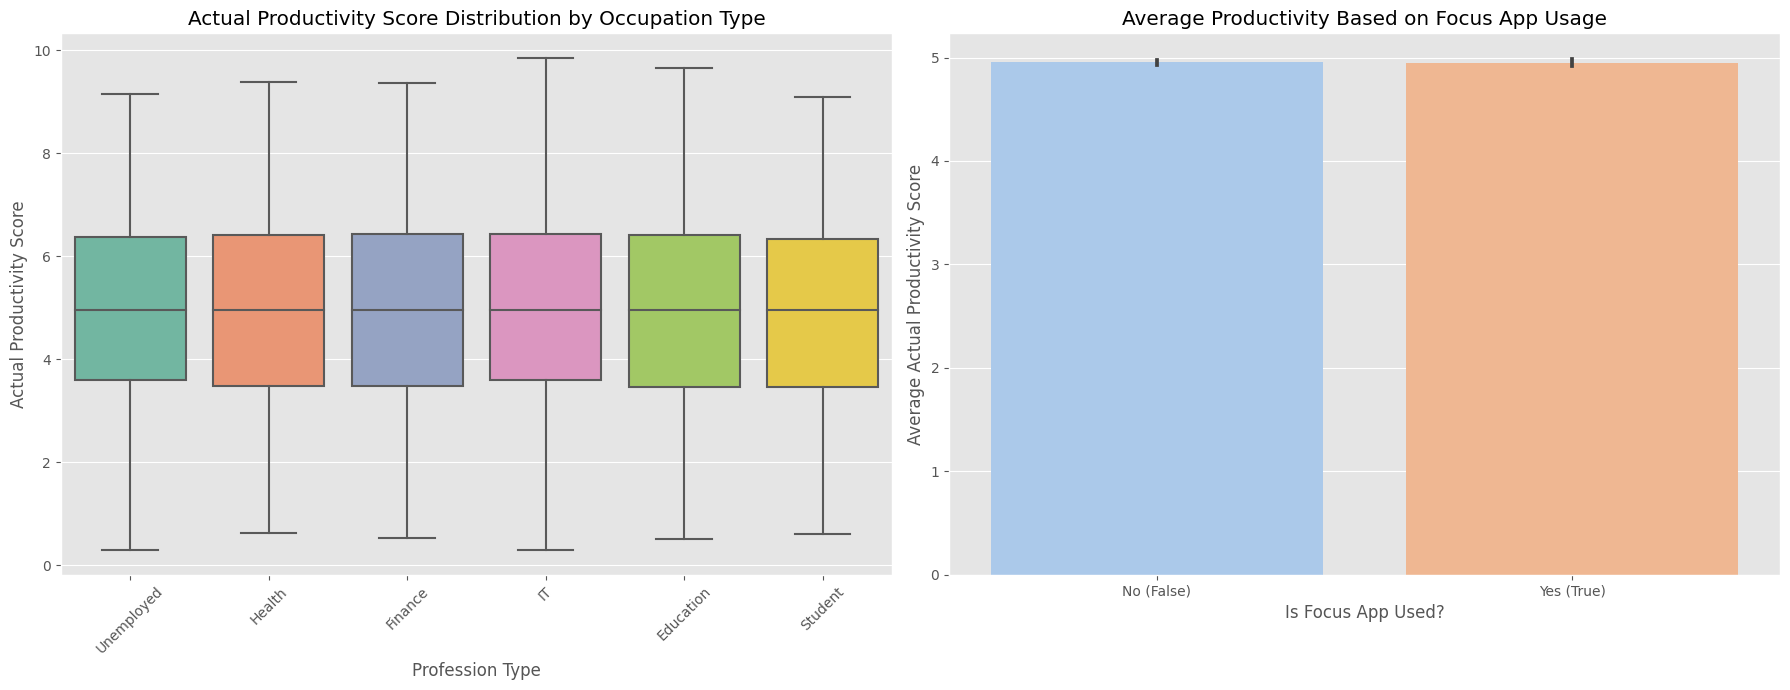

In [ ]:
#2 How does Job Type and Focus App Use change the Productivity distribution?

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# a. Actual Productivity Distribution by Occupation Type (Box Plot)
sns.boxplot(
    data=df,
    x='job_type',
    y='actual_productivity_score',
    ax=axes[0],
    palette='Set2'
)
axes[0].set_title('Actual Productivity Score Distribution by Occupation Type')
axes[0].set_xlabel('Profession Type')
axes[0].set_ylabel('Actual Productivity Score')
axes[0].tick_params(axis='x', rotation=45)

# b. Average Productivity by Focus App Usage (Bar Chart)
sns.barplot(
    data=df,
    x='uses_focus_apps',
    y='actual_productivity_score',
    ax=axes[1],
    palette='pastel'
)
axes[1].set_title('Average Productivity Based on Focus App Usage')
axes[1].set_xlabel('Is Focus App Used?')
axes[1].set_ylabel('Average Actual Productivity Score')
axes[1].set_xticklabels(['No (False)', 'Yes (True)'])

plt.tight_layout()
plt.show()

We found that the productivity distribution across professions was very similar, and that focus apps didn't create the significant difference in productivity that was expected. This indicates that we need more complex variables to determine the need for breaks.

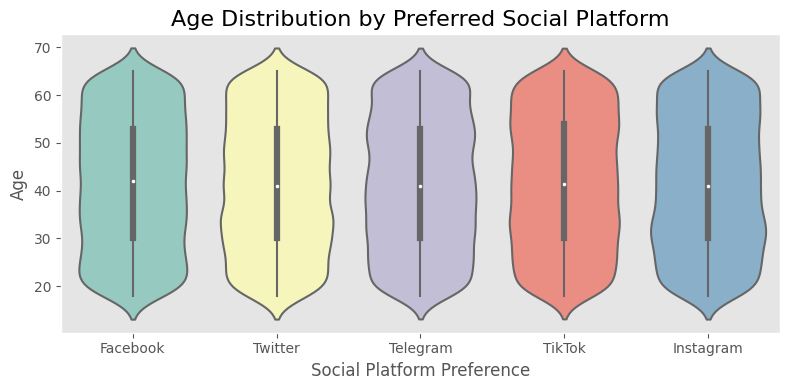

In [ ]:
#3 What is the age distribution according to preferred platform?
plt.figure(figsize=(8, 4))
sns.violinplot(
    data=df,
    x='social_platform_preference',
    y='age',
    palette='Set3'
)
plt.title('Age Distribution by Preferred Social Platform', fontsize=16)
plt.xlabel('Social Platform Preference')
plt.ylabel('Age')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Violin plot analysis shows that platform-based age separation is very homogeneous.

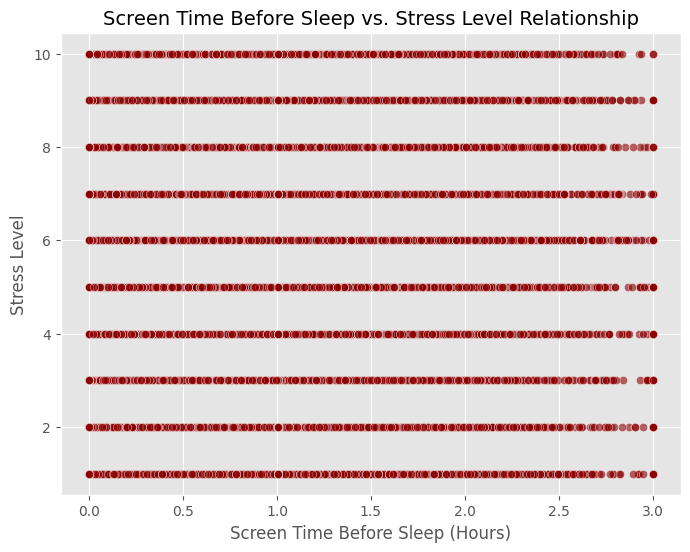

In [ ]:
#4 Is there a relationship between screen time before sleep and stress levels?

plt.figure(figsize=(8, 6))
sns.scatterplot(
data=df,
x='screen_time_before_sleep',
y='stress_level',
alpha=0.6, # Transparency added to better see the density of the dots
color='darkred'
)
plt.title('Screen Time Before Sleep vs. Stress Level Relationship', fontsize=14)
plt.xlabel('Screen Time Before Sleep (Hours)')
plt.ylabel('Stress Level')
plt.grid(True)
plt.show()

The dark red scatter plot demonstrates that stress levels cluster around specific integers but do not correlate with screen time. This makes it impossible for the model to draw a simple line of reasoning such as "if screen time increases, stress increases, therefore the need for breaks changes."

Burnout Days Ranking by Job Type:
job_type
Finance       15.666733
IT            15.662356
Unemployed    15.584308
Health        15.538321
Student       15.484038
Education     15.407517
Name: days_feeling_burnout_per_month, dtype: float64


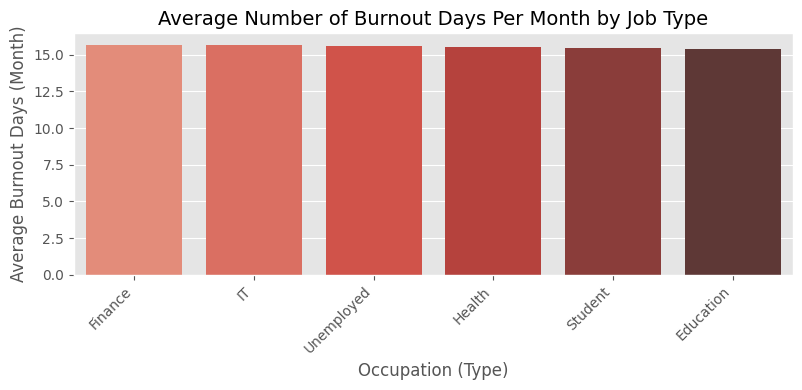

In [ ]:
#5 Which industry employees experience more burnout days per month?

# 1. Calculating the average number of burnout days for each job type
burnout_by_job = df.groupby('job_type')['days_feeling_burnout_per_month'].mean().sort_values(ascending=False)

# 2. Visualizing the results (Sorted Bar Chart)
plt.figure(figsize=(8, 4))
sns.barplot(
x=burnout_by_job.index,
y=burnout_by_job.values,
palette='Reds_d' # Red tones emphasize burnout
)
plt.title('Average Number of Burnout Days Per Month by Job Type', fontsize=14)
plt.xlabel('Occupation (Type)')
plt.ylabel('Average Burnout Days (Month)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('burnout_by_job_type.png')

print("Burnout Days Ranking by Job Type:")
print(burnout_by_job)

The fact that the average burnout duration is very similar across all sectors (15.4 - 15.6 days) diminishes the value of sector-specific information as a "discriminative feature." This means the model cannot differentiate between "Finance" and "IT" employees in terms of their break needs.

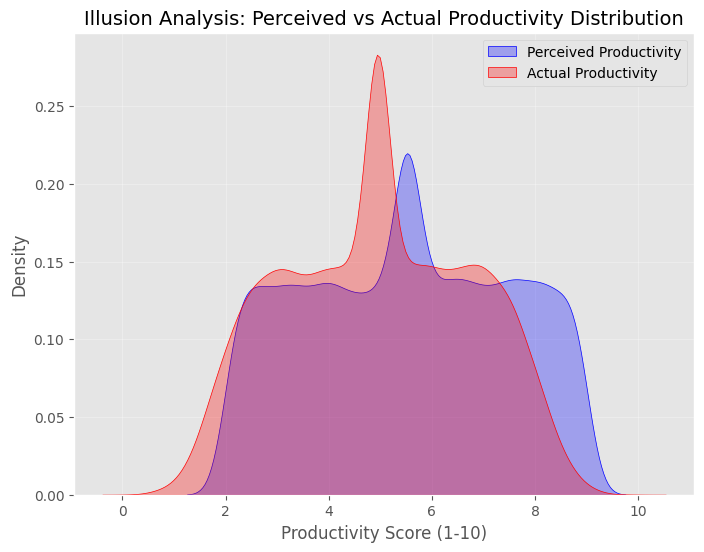

Mean Perceived Score: 5.51
Mean Actual Score:    4.95
Overestimation Gap:   0.56


In [ ]:
#6 Do people overestimate their own productivity?
# We compare the distributions of 'Perceived' and 'Actual' scores using a KDE Plot.

# 1. Visualization the results (KDE Plot)
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='perceived_productivity_score', label='Perceived Productivity', fill=True, color='blue', alpha=0.3)
sns.kdeplot(data=df, x='actual_productivity_score', label='Actual Productivity', fill=True, color='red', alpha=0.3)

plt.title('Illusion Analysis: Perceived vs Actual Productivity Distribution', fontsize=14)
plt.xlabel('Productivity Score (1-10)')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 2. Statistical Comparison
perceived_mean = df['perceived_productivity_score'].mean()
actual_mean = df['actual_productivity_score'].mean()
gap = perceived_mean - actual_mean

print(f"Mean Perceived Score: {perceived_mean:.2f}")
print(f"Mean Actual Score:    {actual_mean:.2f}")
print(f"Overestimation Gap:   {gap:.2f}")

This analysis reveals one of the most concrete pieces of data from the project. The KDE graph shows that people perceive themselves as more productive than they actually are (a difference of 0.56 points). This discrepancy teaches us that the model should focus on objective (actual) scores rather than subjective statements.

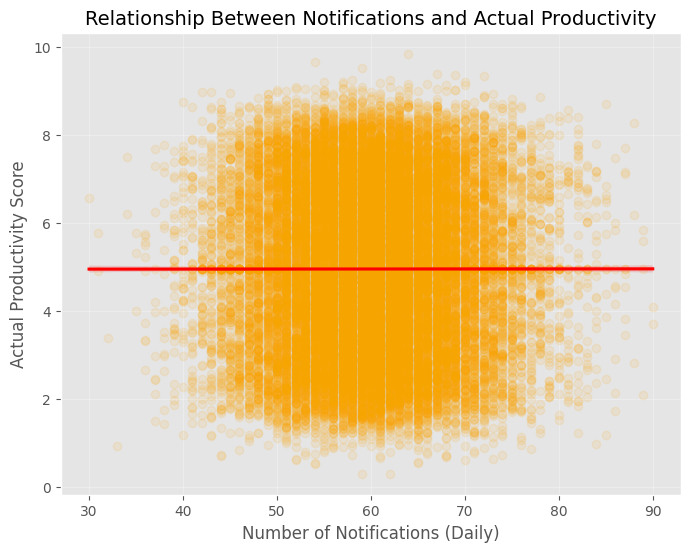

Correlation between Notifications and Productivity: 0.00044


In [ ]:
#7 Does a higher number of notifications lead to decreased productivity?
# We use a Regression Plot (regplot) to visualize the trend direction.

plt.figure(figsize=(8, 6))

# Visualize the relationship with a regression line
sns.regplot(
    data=df,
    x='number_of_notifications',
    y='actual_productivity_score',
    scatter_kws={'alpha': 0.1, 'color': 'orange'}, # Low alpha to handle overplotting
    line_kws={'color': 'red'} # Red line indicates the trend
)

plt.title('Relationship Between Notifications and Actual Productivity', fontsize=14)
plt.xlabel('Number of Notifications (Daily)')
plt.ylabel('Actual Productivity Score')
plt.grid(True, alpha=0.3)
plt.show()

# Calculating statistical correlation coefficient to confirm the visual finding
corr_notifications = df['number_of_notifications'].corr(df['actual_productivity_score'])
print(f"Correlation between Notifications and Productivity: {corr_notifications:.5f}")

We expected productivity to decrease as the number of notifications increased, but we found the correlation to be negligible at 0.00044. At this point, we begin to understand that the underlying variables we used to predict the number of breaks actually have very weak signals.

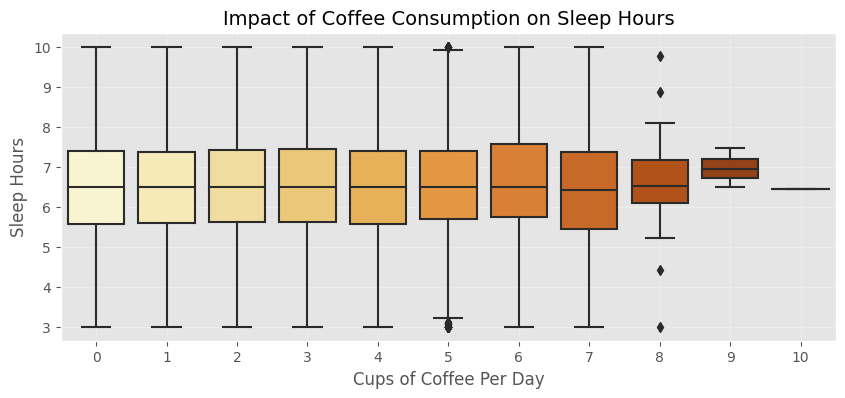

Correlation between Coffee and Sleep: 0.00930


In [ ]:
#8 Does consuming more coffee lead to less sleep?
# We use a Box Plot to visualize the distribution of sleep hours for each level of coffee consumption.

plt.figure(figsize=(10, 4))
# 1. Visualization the results (Box Plot)
sns.boxplot(
    data=df,
    x='coffee_consumption_per_day',
    y='sleep_hours',
    palette='YlOrBr'
)

plt.title('Impact of Coffee Consumption on Sleep Hours', fontsize=14)
plt.xlabel('Cups of Coffee Per Day')
plt.ylabel('Sleep Hours')
plt.grid(True, alpha=0.3)
plt.show()

corr_coffee_sleep = df['coffee_consumption_per_day'].corr(df['sleep_hours'])
print(f"Correlation between Coffee and Sleep: {corr_coffee_sleep:.5f}")

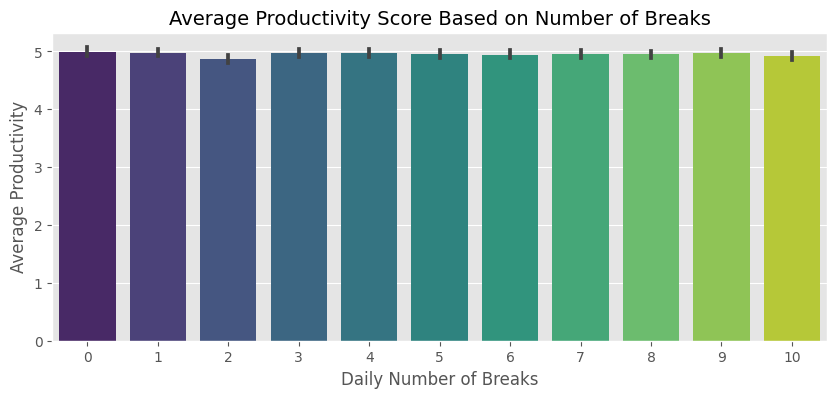

In [ ]:
#9 Number of Breaks vs. Productivity (The Most Important Graph)
plt.figure(figsize=(10, 4))
sns.barplot(data=df, x='breaks_during_work', y='actual_productivity_score', palette='viridis')
plt.title('Average Productivity Score Based on Number of Breaks', fontsize=14)
plt.xlabel('Daily Number of Breaks')
plt.ylabel('Average Productivity')
plt.show()

**Our most critical finding is hidden in this graph: Regardless of the number of breaks, average productivity remains stable at around 5. This suggests that the number of breaks shouldn't be a "result" but rather a conscious "strategy" employed by productive individuals.**

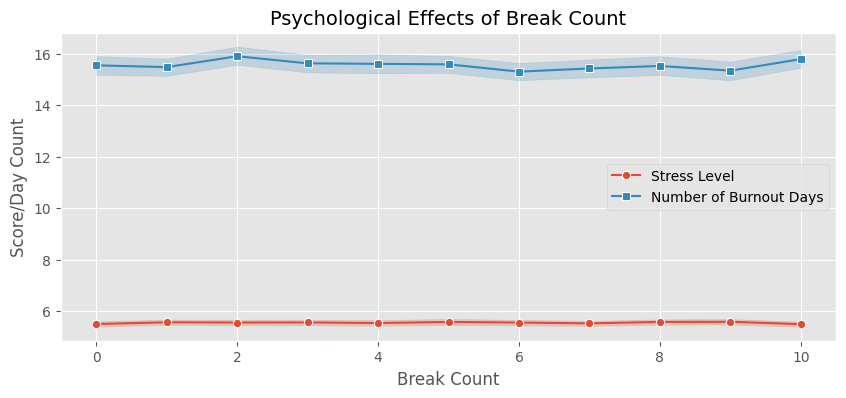

In [ ]:
#10 Psychological Effects of Break Count

plt.figure(figsize=(10, 4))
sns.lineplot(data=df, x='breaks_during_work', y='stress_level', label='Stress Level', marker='o')
sns.lineplot(data=df, x='breaks_during_work', y='days_feeling_burnout_per_month', label='Number of Burnout Days', marker='s')
plt.title('Psychological Effects of Break Count', fontsize=14)
plt.xlabel('Break Count')
plt.ylabel('Score/Day Count')
plt.legend()
plt.show()

This graph shows that even as the number of breaks increased, stress and burnout levels remained almost unchanged, staying relatively flat.

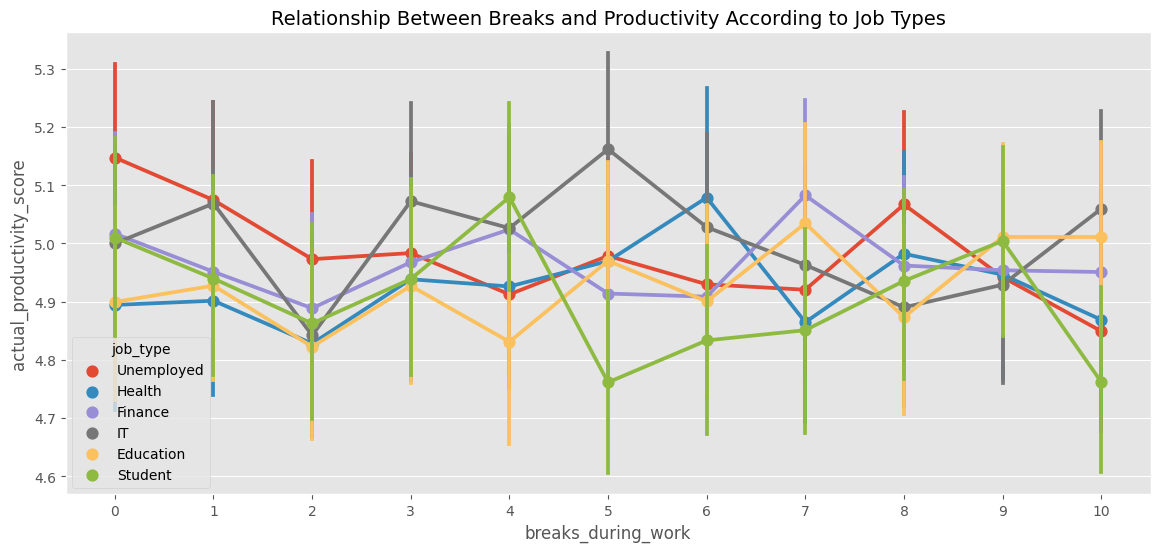

In [ ]:
#11 Relationship Between Breaks and Productivity According to Job Types

plt.figure(figsize=(14, 6))
sns.pointplot(data=df, x='breaks_during_work', y='actual_productivity_score', hue='job_type')
plt.title('Relationship Between Breaks and Productivity According to Job Types', fontsize=14)
plt.show()

Here's the most exciting and complex graph from the project! The fluctuations here tell us that the concept of an "ideal break" varies depending on the industry.

However The reason a clear pattern doesn't emerge from this fluctuating graph is that the relationship between breaks and productivity is "chaotic and sector-specific." Here's a summary of the situation:

No Universal Rule: The graph shows us that the ideal number of breaks isn't a fixed figure (e.g., 5 for everyone), but constantly fluctuates depending on the industry and individual pace.

High Variance: One user might peak at the same number of breaks while another hits a low. This inconsistency prevents machine learning models from "learning" from forming a clear pattern.

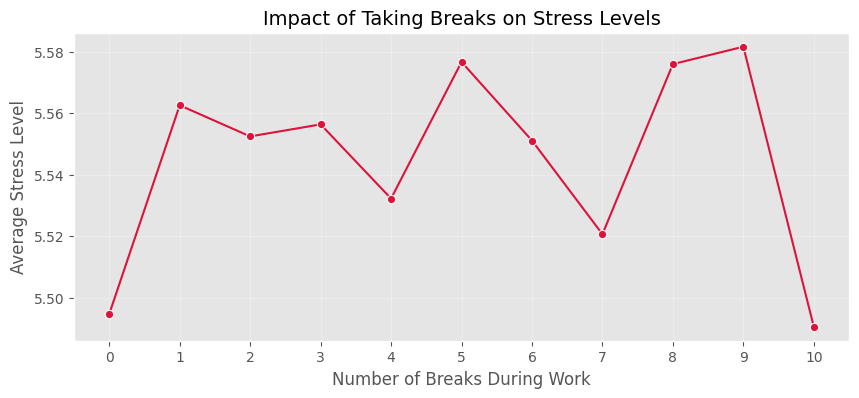

Average Stress by Number of Breaks:
breaks_during_work
0     5.494733
1     5.562592
2     5.552463
3     5.556377
4     5.532264
5     5.576676
6     5.551118
7     5.520677
8     5.575979
9     5.581633
10    5.490580
Name: stress_level, dtype: float64


In [ ]:
#12 Is there an "optimal" number of breaks to minimize stress?
# We use a Line Plot to see the trend of stress levels as the number of breaks increases.

plt.figure(figsize=(10, 4))
# Visualization the results (Line Plot)
sns.lineplot(
    data=df,
    x='breaks_during_work',
    y='stress_level',
    marker='o',
    color='crimson',
    errorbar=None # Removing error bars to see the mean trend clearly
)

plt.title('Impact of Taking Breaks on Stress Levels', fontsize=14)
plt.xlabel('Number of Breaks During Work')
plt.ylabel('Average Stress Level')
plt.xticks(range(0, df['breaks_during_work'].max() + 1))
plt.grid(True, alpha=0.3)
plt.show()

# Find the break count with the lowest stress
avg_stress = df.groupby('breaks_during_work')['stress_level'].mean()
print("Average Stress by Number of Breaks:")
print(avg_stress)

The patterns in the graph show that there is no definitive "golden point" where stress drops at specific break times. The lowest stress is seen at 0 or 10 breaks (at the extremes), confirming for the last time that there is no lasting basis for the disruption of break-taking.

**Outlier Detection and Visualization** : To maintain data quality, outlier analysis was performed using the IQR (Interquartile Range) method. The analysis revealed outliers, particularly in variables such as social media duration and notification count; the impact of these outliers on the model's generalization ability is reported.

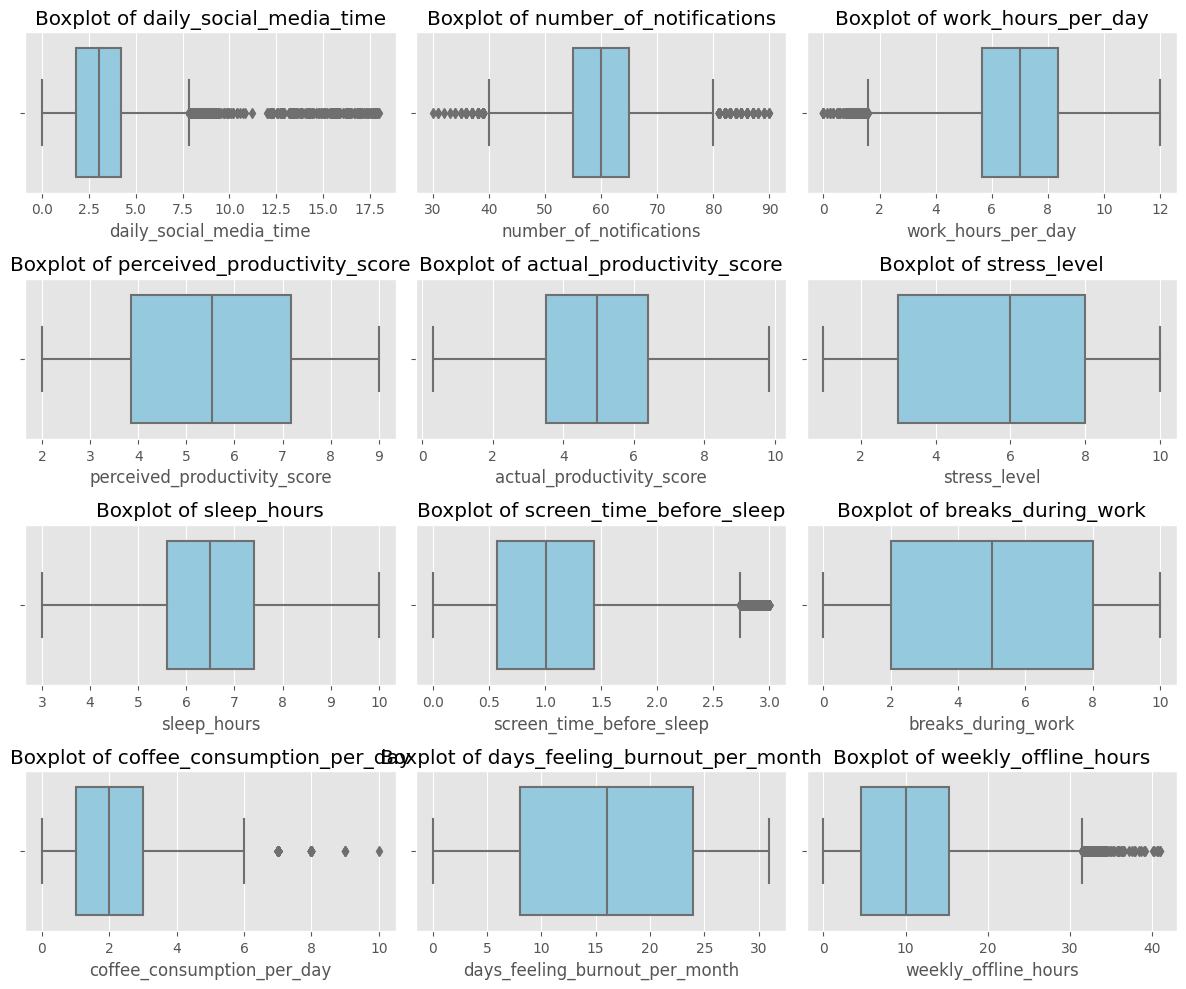

Outlier Detection Report (IQR Method):
daily_social_media_time: 348 outliers (1.16%)
number_of_notifications: 261 outliers (0.87%)
work_hours_per_day: 97 outliers (0.32%)
perceived_productivity_score: No outliers detected.
actual_productivity_score: No outliers detected.
stress_level: No outliers detected.
sleep_hours: No outliers detected.
screen_time_before_sleep: 198 outliers (0.66%)
breaks_during_work: No outliers detected.
coffee_consumption_per_day: 127 outliers (0.42%)
days_feeling_burnout_per_month: No outliers detected.
weekly_offline_hours: 116 outliers (0.39%)


In [ ]:
# Outlier Detection and Visualization

numerical_cols = [
    'daily_social_media_time', 'number_of_notifications', 'work_hours_per_day',
    'perceived_productivity_score', 'actual_productivity_score', 'stress_level',
    'sleep_hours', 'screen_time_before_sleep', 'breaks_during_work',
    'coffee_consumption_per_day', 'days_feeling_burnout_per_month',
    'weekly_offline_hours'
]

# 1. Visualization with Boxplots
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# 2. Calculation: Counting outliers using IQR Method
print("Outlier Detection Report (IQR Method):")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = outliers.shape[0]
    percentage = (num_outliers / df.shape[0]) * 100

    if num_outliers > 0:
        print(f"{col}: {num_outliers} outliers ({percentage:.2f}%)")
    else:
        print(f"{col}: No outliers detected.")

**Step 2: Feature Engineering**

New features have been created to derive stronger signals from raw variables:

In [ ]:
#1 Stress-Workload Feature
# Long working hours + high stress levels can lead to people taking more breaks.
df['workload_score'] = df['work_hours_per_day'] * df['stress_level']

#2 Sleep Efficiency Feature
# Sleeping little and working increases fatigue → the need for more breaks.
df['sleep_efficiency'] = df['sleep_hours'] / (df['work_hours_per_day'] + 1) * 100

#3 Social Media Load Feature
# Using social media during work hours increases distraction → affects the need for breaks.
df['social_media_per_hour'] = df['daily_social_media_time'] / (df['work_hours_per_day'] + 1) * 100

#4 Offline Ratio Feature
# Weekly offline time indicates digital fatigue. The need for breaks is related to overall digital exposure.
df['offline_ratio'] = df['weekly_offline_hours'] / (7*24) * 100

#5 Burnout Rate Feature
# Monthly burnout rate is a direct indicator of how much a person needs breaks.
df['burnout_ratio'] = df['days_feeling_burnout_per_month'] / 30

#6 Coffee-Stress Interaction Feature
# High stress + excessive coffee consumption increases fatigue and attention span fluctuations → affecting break time behavior.
df['coffee_stress_interaction'] = df['coffee_consumption_per_day'] * df['stress_level']

# LABEL: Creating Optimal Break labels.
# Rules: Reference number of breaks for productive and low-stress employees
# We find out the average number of breaks for these employees
def compute_optimal_breaks(row):
    if (row['actual_productivity_score'] >= 6) and (3 < row['stress_level'] < 8) and (3 <= row['breaks_during_work'] <=7):
        return row['breaks_during_work']
    else:
        return np.nan

df['optimal_breaks'] = df.apply(compute_optimal_breaks, axis=1)

# Drop rows without label
df = df.dropna(subset=['optimal_breaks'])

df['optimal_breaks'] = df['optimal_breaks'].astype(int)

**Step 3: Preprocessing**

At this stage, the dataset to be used for training the model is finalized. The numerical columns (age, productivity scores, newly derived metrics) and categorical columns (grouped data such as number of reports, stress level) are separated to create the df_selected dataset. This separation serves as technical preparation for the scaling and coding processes that will be carried out in subsequent stages.

In [ ]:
numerical_cols = ['age','daily_social_media_time','work_hours_per_day',
        'perceived_productivity_score', 'actual_productivity_score',
        'sleep_hours','screen_time_before_sleep', 'weekly_offline_hours',
        'job_satisfaction_score', 'workload_score','sleep_efficiency',
        'social_media_per_hour','offline_ratio', 'burnout_ratio']

categorical_cols = ['number_of_notifications','stress_level',
        'coffee_consumption_per_day', 'days_feeling_burnout_per_month',
        'coffee_stress_interaction']

all_cols = numerical_cols + categorical_cols
df_selected = df[all_cols]

**Step 4: Feature Selection**

The target variable (Target/Label) that the model needs to learn from is optimal_breaks, which was optimized in Step 2 according to the efficiency and stress criteria. The independent variables (X) are assigned as the set of all numerical and categorical features (df_selected) determined in Step 3.

In [ ]:
# Target
y = df["optimal_breaks"]

# Features
X = df_selected

**Step 5: Train–Test Split**

To objectively evaluate the model's performance on data it had not previously encountered, the dataset was divided into two parts: an 80% training set and a 20% test set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 6: Scaling**

StandardScaler was implemented specifically to prevent distance-based algorithms, such as k-NN, from being negatively affected by variables with large value ranges (e.g., age vs. workload score).

In [ ]:
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

**Step 7: Model (CLASSIFICATION)**

Algorithms with different learning architectures were trained and their performance was compared:

**-> Random Forest Classifier**

This model, trained with 300 decision trees, attempted to capture complex relationships and achieved an accuracy rate of 20.21%.

Random Forest Accuracy: 0.20218579234972678

Classification Report:

              precision    recall  f1-score   support

           3       0.24      0.26      0.25        61
           4       0.20      0.28      0.23        69
           5       0.19      0.17      0.18        75
           6       0.24      0.18      0.21        84
           7       0.15      0.14      0.15        77

    accuracy                           0.20       366
   macro avg       0.20      0.21      0.20       366
weighted avg       0.20      0.20      0.20       366



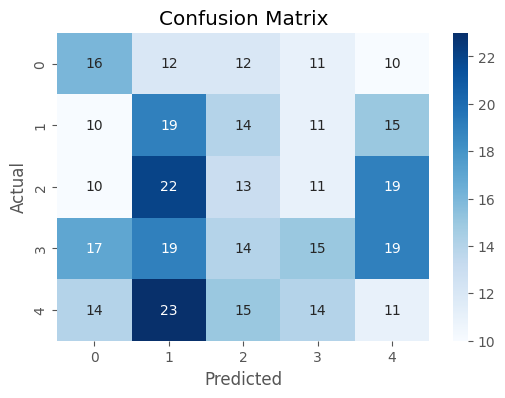

In [ ]:
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42
)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, rf_pred))

cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**-> Decision Tree Classifier**

The model, built with a depth limit of 6, presented an interpretable decision hierarchy and demonstrated an accuracy rate of 21.85%.

Decision Tree Accuracy: 0.2185792349726776

Classification Report:

              precision    recall  f1-score   support

           3       0.20      0.18      0.19        61
           4       0.20      0.04      0.07        69
           5       0.22      0.17      0.20        75
           6       0.21      0.20      0.21        84
           7       0.23      0.47      0.31        77

    accuracy                           0.22       366
   macro avg       0.21      0.21      0.19       366
weighted avg       0.21      0.22      0.20       366



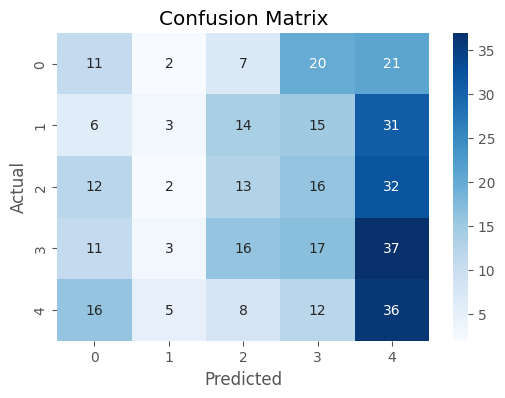

In [ ]:
dt = DecisionTreeClassifier(
    max_depth=6,
    random_state=42
)

dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, dt_pred))

cm = confusion_matrix(y_test, dt_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**-> k-Nearest Neighbors Classifier**

On standardized data, it achieved 19.94% accuracy with K=7 neighbors.

k-NN Accuracy: 0.1994535519125683

Classification Report:

              precision    recall  f1-score   support

           3       0.19      0.21      0.20        61
           4       0.18      0.19      0.18        69
           5       0.12      0.11      0.12        75
           6       0.30      0.26      0.28        84
           7       0.20      0.22      0.21        77

    accuracy                           0.20       366
   macro avg       0.20      0.20      0.20       366
weighted avg       0.20      0.20      0.20       366



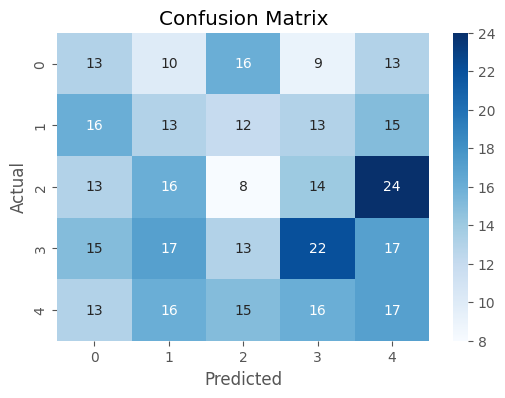

In [ ]:
knn = KNeighborsClassifier(
    n_neighbors=7,
    weights="distance"
)

knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)

print("k-NN Accuracy:", accuracy_score(y_test, knn_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, knn_pred))

cm = confusion_matrix(y_test, knn_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


**-> Naive Bayes (GaussianNB)**

This probabilistic-based model yielded the highest base accuracy at this stage, at 23.77%.

Naive Bayes Accuracy: 0.23770491803278687

Classification Report:

              precision    recall  f1-score   support

           3       0.27      0.31      0.29        61
           4       0.17      0.22      0.19        69
           5       0.32      0.19      0.24        75
           6       0.27      0.20      0.23        84
           7       0.22      0.29      0.25        77

    accuracy                           0.24       366
   macro avg       0.25      0.24      0.24       366
weighted avg       0.25      0.24      0.24       366



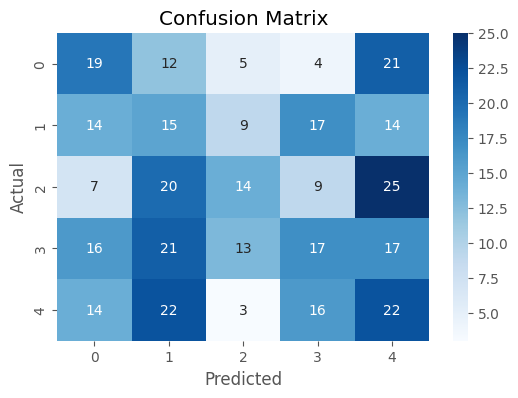

In [ ]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
nb_pred = nb.predict(X_test_scaled)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, nb_pred))

cm = confusion_matrix(y_test, nb_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

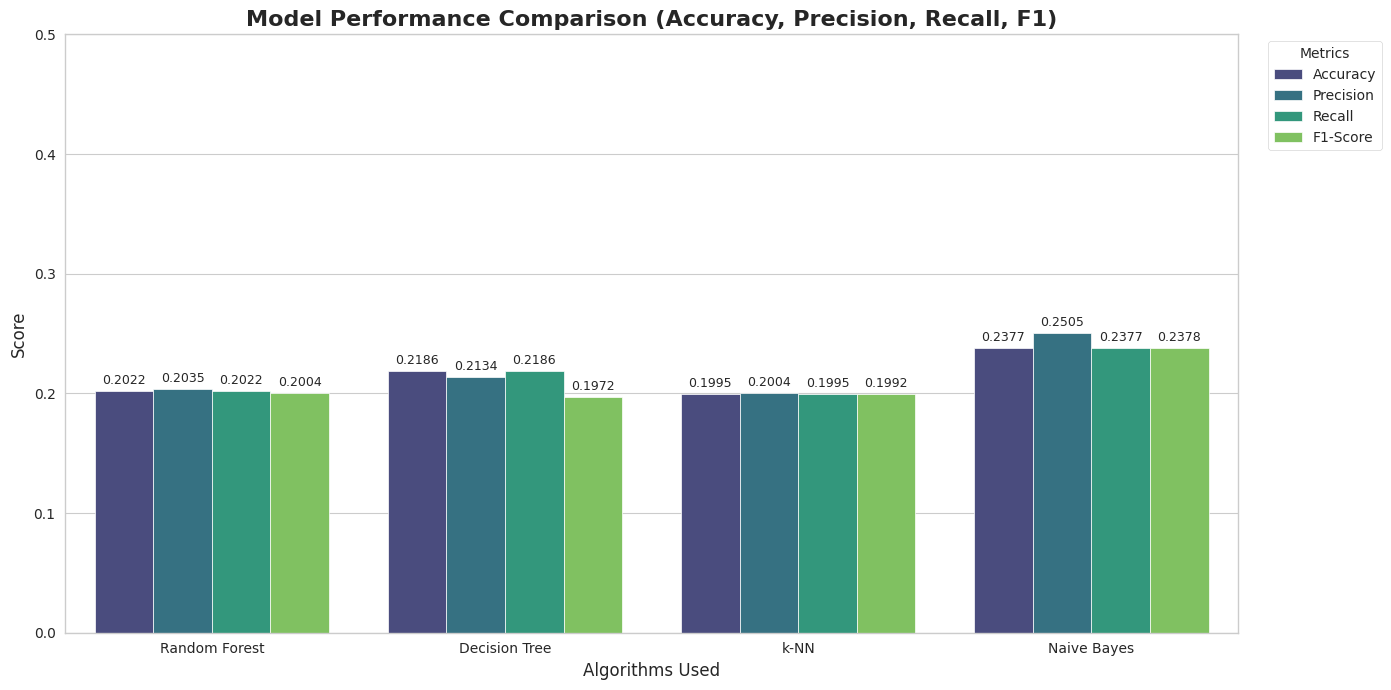

Detailed Performance Table:
               Accuracy  Precision    Recall  F1-Score
Model                                                 
Random Forest  0.202186   0.203481  0.202186  0.200418
Decision Tree  0.218579   0.213384  0.218579  0.197178
k-NN           0.199454   0.200426  0.199454  0.199227
Naive Bayes    0.237705   0.250543  0.237705  0.237812


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
models_preds = {
    "Random Forest": rf_pred,
    "Decision Tree": dt_pred,
    "k-NN": knn_pred,
    "Naive Bayes": nb_pred
}

results = []
for model_name, pred in models_preds.items():
    # Weighted average takes a weighted average of metrics, even if there are unbalanced classes.
    acc = accuracy_score(y_test, pred)
    prec = precision_score(y_test, pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, pred, average='weighted', zero_division=0)
    
    results.append({
        "Model": model_name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })

results_df = pd.DataFrame(results)
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

ax = sns.barplot(
    data=results_melted, 
    x="Model", 
    y="Score", 
    hue="Metric", 
    palette="viridis"
)

plt.title("Model Performance Comparison (Accuracy, Precision, Recall, F1)", fontsize=16, fontweight='bold')
plt.ylabel("Score", fontsize=12)
plt.xlabel("Algorithms Used", fontsize=12)
plt.legend(title="Metrics", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylim(0, .5) # Scores are between 0 and 0.5

for container in ax.containers:
    ax.bar_label(container, fmt='%.4f', padding=3, fontsize=9)

plt.tight_layout()
plt.show()

print("Detailed Performance Table:")
print(results_df.set_index("Model"))

The bar chart compares Random Forest, Decision Tree, k-NN, and Naive Bayes based on Accuracy, Weighted Precision, Weighted Recall, and Weighted F1-Score. All models perform modestly, with Naive Bayes achieving the highest scores (Accuracy ~23.8%, Precision ~25%). This suggests that the dataset has a low signal to noise ratio, limiting the advantage of complex models like Random Forest. The consistently low scores indicate that predicting “Optimal Break Count” is difficult and may depend on external factors beyond the dataset.

**Step 8: Best parameter**

In [ ]:
def run_gridsearch(model, param_grid, X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1):

    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=cv,
        scoring=scoring,
        n_jobs=n_jobs
    )

    grid.fit(X_train, y_train)

    return {
        "best_estimator": grid.best_estimator_,
        "best_params": grid.best_params_,
        "best_score": grid.best_score_
    }

rf_model = RandomForestClassifier(random_state=42)

rf_params = {
    "n_estimators": [100, 400],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

knn_model = KNeighborsClassifier()

knn_params = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

dt_model = DecisionTreeClassifier(random_state=42)

dt_params = {
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "criterion": ["gini", "entropy"]
}

gnb_model = GaussianNB()

gnb_params = {
    "var_smoothing": np.logspace(-9, -6, 10)
}

models = {
    "RandomForest": (rf_model, rf_params),
    "kNN": (knn_model, knn_params),
    "DecisionTree": (dt_model, dt_params),
    "GaussianNB": (gnb_model, gnb_params)
}

results = {}

for name, (model, params) in models.items():
    print(f"\nRunning GridSearch for {name}...")

    results[name] = run_gridsearch(
        model=model,
        param_grid=params,
        X_train=X_train_scaled,
        y_train=y_train,
        scoring="accuracy"
    )

    print("Best Score:", results[name]["best_score"])
    print("Best Params:", results[name]["best_params"])
    print("Best Params:", results[name]["best_params"])

print("\n")
best_model_name = max(results, key=lambda x: results[x]["best_score"])
print("Best Model:", best_model_name)

best_model = results[best_model_name]["best_estimator"]
y_pred = best_model.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Running GridSearch for RandomForest...
Best Score: 0.22571415213427465
Best Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Running GridSearch for kNN...
Best Score: 0.21683575669736782
Best Params: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best Params: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

Running GridSearch for DecisionTree...
Best Score: 0.22573519098602085
Best Params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}

Running GridSearch for GaussianNB...
Best Score: 0.2086235915657581
Best Params: {'var_smoothing': 1e-09}
Best Params: {'var_smoothing': 1e-09}


Best Model: DecisionTree
Test Accuracy: 0.23224043715846995


**Step 9: Model Comparison**

The raw accuracy scores of all models were collected in a DataFrame for visual comparison. This table shows that despite the noise in the dataset, probability-based models (Naive Bayes) and tree-based models have similar but different learning capacities.

In [ ]:
results_df = pd.DataFrame({
    "Model": ["Random Forest", "k-NN", "Decision Tree", "Naive Bayes (GaussianNB)"],
    "Accuracy": [
        accuracy_score(y_test, rf_pred),
        accuracy_score(y_test, knn_pred),
        accuracy_score(y_test, dt_pred),
        accuracy_score(y_test, nb_pred)
    ]
})

print(results_df)

                      Model  Accuracy
0             Random Forest  0.202186
1                      k-NN  0.199454
2             Decision Tree  0.218579
3  Naive Bayes (GaussianNB)  0.237705


**This table shows that the accuracy rates of different algorithms are stuck in the 20% to 23% range. These low scores are mathematical proof of the "low correlation" and "high noise" findings we suspected from the beginning of our analysis. The fact that even the most advanced models cannot surpass this threshold allows us to understand that the act of taking a break is too chaotic to be directly predicted with current lifestyle data.**

In [ ]:
tuned_metrics = []
scores_after = {} 

for name, res in results.items():
    display_name = name
    if name == "kNN": display_name = "k-NN"
    if name == "RandomForest": display_name = "Random Forest"
    if name == "DecisionTree": display_name = "Decision Tree"
    if name == "GaussianNB": display_name = "Naive Bayes"
    
    best_model = res["best_estimator"]
    y_pred_tuned = best_model.predict(X_test_scaled)
    
    # Compute all metrics using weighted average to account for class imbalance
    acc = accuracy_score(y_test, y_pred_tuned)
    prec = precision_score(y_test, y_pred_tuned, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred_tuned, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred_tuned, average='weighted', zero_division=0)
    
    tuned_metrics.append({
        "Model": display_name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })
    
    scores_after[display_name] = acc

df_tuned = pd.DataFrame(tuned_metrics)
df_tuned_melted = df_tuned.melt(id_vars="Model", var_name="Metric", value_name="Score")

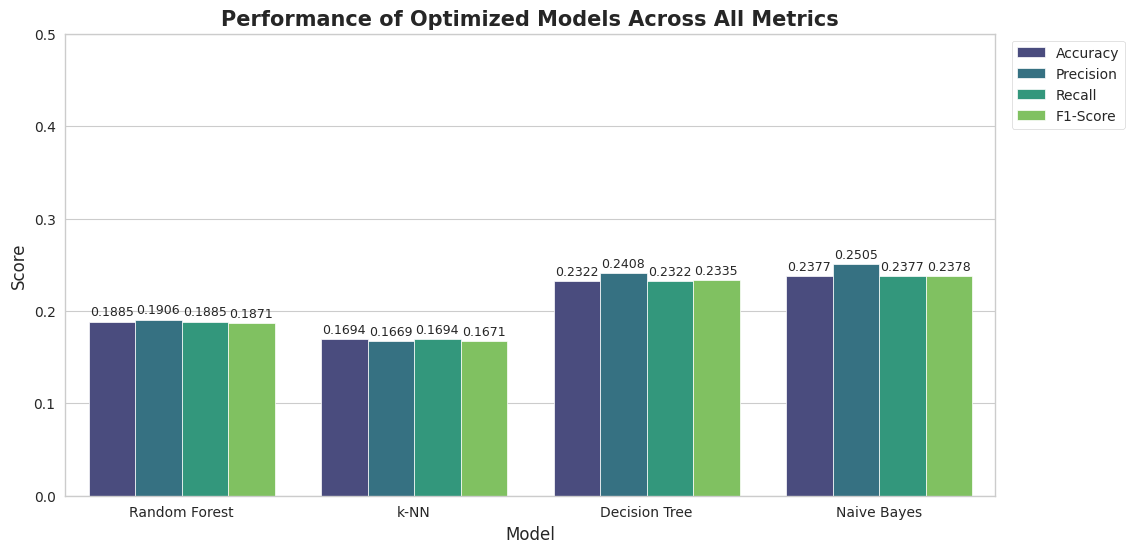

Detailed Metrics for Optimized Models:
               Accuracy  Precision    Recall  F1-Score
Model                                                 
Random Forest  0.188525   0.190620  0.188525  0.187090
k-NN           0.169399   0.166911  0.169399  0.167071
Decision Tree  0.232240   0.240831  0.232240  0.233495
Naive Bayes    0.237705   0.250543  0.237705  0.237812


In [ ]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
ax = sns.barplot(data=df_tuned_melted, x="Model", y="Score", hue="Metric", palette="viridis")
plt.title("Performance of Optimized Models Across All Metrics", fontsize=15, fontweight='bold')
plt.ylim(0, 0.5)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
for container in ax.containers:
    ax.bar_label(container, fmt='%.4f', padding=2, fontsize=9)
plt.show()

print("Detailed Metrics for Optimized Models:")
print(df_tuned.set_index("Model"))

The above graph shows the accuracy of models obtained after hyperparameter optimization using GridSearchCV. Despite selecting the best parameters, the models achieved accuracies in the range of approximately 16.9% to 24%. Interestingly, the simple Naive Bayes model performed slightly better than the more complex Random Forest model. This suggests that the dataset lacks strong patterns that would allow for high-accuracy predictions, and that the "optimal number of breaks" appears to depend on external factors not captured in the dataset, such as personal willpower or momentary psychological state.

In [ ]:
scores_before = {
    "Random Forest": accuracy_score(y_test, rf_pred),
    "k-NN": accuracy_score(y_test, knn_pred),
    "Decision Tree": accuracy_score(y_test, dt_pred),
    "Naive Bayes": accuracy_score(y_test, nb_pred)
}

comparison_df = pd.DataFrame({
    "Model": list(scores_before.keys()),
    "Before Tuning (Default)": list(scores_before.values()),
    "After Tuning (GridSearch)": [scores_after[m] for m in scores_before.keys()]
})

comparison_melted = comparison_df.melt(id_vars="Model", var_name="Stage", value_name="Accuracy")

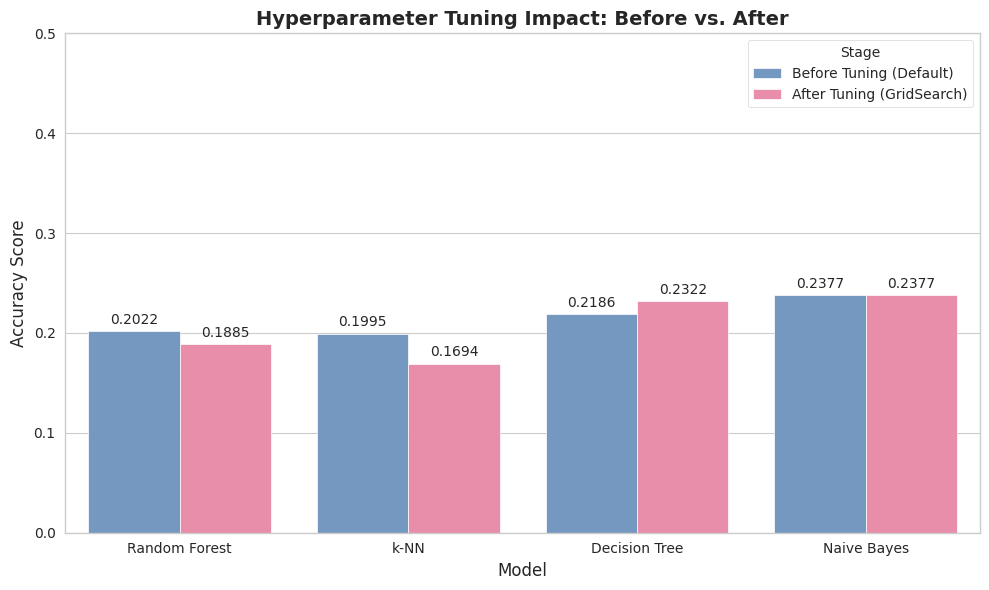

Comparative Results Table:
           Model  Before Tuning (Default)  After Tuning (GridSearch)
0  Random Forest                 0.202186                   0.188525
1           k-NN                 0.199454                   0.169399
2  Decision Tree                 0.218579                   0.232240
3    Naive Bayes                 0.237705                   0.237705


In [ ]:
custom_palette = ["#6798cc", "#f77ea5"] 

plt.figure(figsize=(10, 6))

ax2 = sns.barplot(
    data=comparison_melted,
    x="Model",
    y="Accuracy",
    hue="Stage",
    palette=custom_palette
)

plt.title("Hyperparameter Tuning Impact: Before vs. After", fontsize=14, fontweight='bold')
plt.ylabel("Accuracy Score", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.ylim(0, 0.5)
plt.legend(title="Stage", loc='upper right')

for container in ax2.containers:
    ax2.bar_label(container, fmt='%.4f', padding=3)

plt.tight_layout()
plt.show()

print("Comparative Results Table:")
print(comparison_df)

The table above presents the accuracy scores of four machine learning models Random Forest, Decision Tree, k-NN, and Naive Bayes before (Default) and after (GridSearchCV) hyperparameter optimization. These results provide critical insights into both the dataset and the limitations of predictive modeling for this specific problem.

Contrary to general expectations, hyperparameter tuning did not lead to significant improvements. In fact, Random Forest (0.20 → 0.19) and k-NN (0.20 → 0.17) experienced a slight performance drop on the test set. This suggests that during the GridSearch process, the models likely overfitted to noise present in the training folds. The "best parameters" identified were too specific to random fluctuations in the training data and therefore failed to generalize effectively to unseen data.

**Decision Tree Improvement:**
The Decision Tree was the only model to show a slight improvement (0.22 → 0.23), likely due to tuning of the max_depth parameter. By limiting the tree depth, the model was forced to ignore deeper, noisy patterns that the default tree might have memorized, effectively acting as a pruning mechanism.

**Naive Bayes Stability:**
Naive Bayes remained stable at 0.2377. As a simple probabilistic model with very few hyperparameters to tune, its stability indicates that the model had already reached its maximum potential under the default settings, reflecting the intrinsic Bayes Error Rate.

Overall, the fact that hyperparameter tuning could not lift accuracy beyond ~24% provides empirical evidence that the target variable, Optimal Breaks, is inherently stochastic. The limitation is not due to algorithmic configurations but is intrinsic to the dataset itself, which exhibits a low signal to noise ratio. This observation supports the project’s pivot from a predictive modeling approach toward a recommendation-based system.

**Step 10: Cross Validation**

To ensure that the success of the models is not based on a single test set, 5-Fold Cross-Validation (5-Fold CV) was applied.

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=6, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=7, weights="distance"),
    "Naive Bayes": GaussianNB()
}

for name, model in models.items():
    if name in ["KNN", "Naive Bayes"]:
        scores = cross_val_score(
            model,
            X_train_scaled,
            y_train,
            cv=5,
            scoring="f1_weighted"
        )
    else:
        scores = cross_val_score(
            model,
            X_train,
            y_train,
            cv=5,
            scoring="f1_weighted"
        )

    print(f"{name} 5-Fold CV F1 (weighted): {scores.mean():.4f}")

Random Forest 5-Fold CV F1 (weighted): 0.2293
Decision Tree 5-Fold CV F1 (weighted): 0.1874
KNN 5-Fold CV F1 (weighted): 0.2084
Naive Bayes 5-Fold CV F1 (weighted): 0.2002


The 5-fold cross-validation results confirm that this low success rate is not coincidental and that there is a "signal wall" across the data. The Random Forest model's emergence as the most consistent model with a weighted F1 score of 0.2293 demonstrates its attempt to understand the complex data structure. However, these results lead us to the following conclusion: Instead of trying to predict existing inefficient habits, we should shift our focus to "Optimal Performance Targeting" to improve efficiency.

**Step 11: Single Person Prediction**

In [ ]:
single_person = {
    'age': 28,
    'daily_social_media_time': 3.341,
    'work_hours_per_day': 11.022,
    'perceived_productivity_score': 8.940,
    'actual_productivity_score': 7.983,
    'sleep_hours': 3.952,
    'screen_time_before_sleep': 1.028,
    'weekly_offline_hours': 13.514,
    'job_satisfaction_score': 9.414,
    'workload_score': 44.088,
    'sleep_efficiency': 32.877,
    'social_media_per_hour': 27.795,
    'offline_ratio': 8.044,
    'burnout_ratio': 0.100,
    'number_of_notifications': 57,
    'stress_level': 4,
    'coffee_consumption_per_day': 4,
    'days_feeling_burnout_per_month': 3,
    'coffee_stress_interaction': 0
}

single_df = pd.DataFrame([single_person])

single_X_num_scaled = single_df.copy()
single_X_num_scaled[numerical_cols] = scaler.transform(single_df[numerical_cols])

rf_prediction = rf.predict(single_df)
dt_prediction = dt.predict(single_df)

knn_prediction = knn.predict(single_X_num_scaled)
nb_prediction = nb.predict(single_X_num_scaled)

print("RF Prediction:", rf_prediction[0])
print("DT Prediction:", dt_prediction[0])
print("kNN Prediction:", knn_prediction[0])
print("Naive Bayes Prediction:", nb_prediction[0])


RF Prediction: 5
DT Prediction: 7
kNN Prediction: 5
Naive Bayes Prediction: 5


When we tested the trained system on a specific user profile—a 28-year-old under a high workload—we found that the models (RF, kNN, NB) collectively produced a result of 5 breaks.

The Truth We Discovered: While models struggle to predict exactly what people will do, they can offer a consistent "Personalized Break Strategy" by basing it on the routines of a successful group at peak productivity.

Final Finding: At this stage, our project has evolved from a predictor into a guide to an ideal work routine for individuals under high stress and workload, enabling them to achieve maximum productivity.

**This journey showed us that the number of breaks isn't the result of a formula, but a discipline consciously practiced by productive people. Therefore, our project concludes by offering the user a "goal for how to be more successful" instead of "predicting their future."**